In [1]:
import seaborn as sns
import pandas as pd
import os
import json
import scipy

# Cofea

In [2]:
data_choose_Cofea = pd.read_csv('../data/analysis/feature_selction/Cofea_193994_5000.bed', sep='\t', comment='t', header=None)
data_choose_Cofea[0] = data_choose_Cofea[0].astype(str)
data_choose_Cofea[1] = data_choose_Cofea[1].astype(int)
data_choose_Cofea[2] = data_choose_Cofea[2].astype(int)

data_choose_HDA = pd.read_csv('../data/analysis/feature_selction/HDA_193994_5000.bed', sep='\t', comment='t', header=None)
data_choose_HDA[0] = data_choose_HDA[0].astype(str)
data_choose_HDA[1] = data_choose_HDA[1].astype(int)
data_choose_HDA[2] = data_choose_HDA[2].astype(int)

data_choose_epi = pd.read_csv('../data/analysis/feature_selction/epi_193994_5000.bed', sep='\t', comment='t', header=None)
data_choose_epi[0] = data_choose_epi[0].astype(str)
data_choose_epi[1] = data_choose_epi[1].astype(int)
data_choose_epi[2] = data_choose_epi[2].astype(int)

data_choose_sig = pd.read_csv('../data/analysis/feature_selction/signac_193994_5000.bed', sep='\t', comment='t', header=None)
data_choose_sig[0] = data_choose_sig[0].astype(str)
data_choose_sig[1] = data_choose_sig[1].astype(int)
data_choose_sig[2] = data_choose_sig[2].astype(int)
data_choose_Cofea,data_choose_HDA,data_choose_epi,data_choose_sig

(          0          1          2
 0      chr7  118364394  118365904
 1      chr7   17060711   17061073
 2      chr9   96731221   96732560
 3      chr7  100046404  100046882
 4     chr11  113276585  113277513
 ...     ...        ...        ...
 4995   chr8  112128658  112129221
 4996  chr12   99369839   99370213
 4997  chr17   49977335   49977810
 4998   chr5  151218617  151219323
 4999  chr14   25766535   25766787
 
 [5000 rows x 3 columns],
           0          1          2
 0      chr5   23432432   23435708
 1      chr4   95049914   95054052
 2      chr7   16399246   16401741
 3     chr12   52602185   52605278
 4     chr16   38087644   38090054
 ...     ...        ...        ...
 4995   chr9   79759275   79760573
 4996   chr3  104992403  104994833
 4997   chr4  155490429  155492717
 4998  chr13   37311490   37313612
 4999  chr19    5636461    5638100
 
 [5000 rows x 3 columns],
           0          1          2
 0     chr19    5636461    5638100
 1     chr13   37311490   37313612

# Cell type-specific peaks from epiScanpy

In [5]:
ATAC_count = np.load('../data/analysis/atac_count.npz')['arr_0']
with open('../data/analysis/atac.json','r',encoding='utf8')as fp:
    ATAC = json.load(fp)
label = ATAC['cell_name']
peaks = []
for peak in ATAC['peak_name']:
    peaks.append(peak[0]+'_'+peak[1]+'_'+peak[2])
peaks = np.array(peaks)
ATAC_all = sc.AnnData(scipy.sparse.csc_matrix(ATAC_count))
ATAC_all.obs['label'] = ATAC['cell_name']
ATAC_all.var_names = peaks

idx = (ATAC_all.obs['label'] == 'Ex. neurons CPN') | (ATAC_all.obs['label'] == 'Microglia') | (ATAC_all.obs['label'] == 'SOM+ Interneurons') | (ATAC_all.obs['label'] == 'Purkinje cells') | (ATAC_all.obs['label'] == 'Oligodendrocytes') | (ATAC_all.obs['label'] == 'Inhibitory neurons') | (ATAC_all.obs['label'] == 'Ex. neurons SCPN') | (ATAC_all.obs['label'] == 'Collisions') | (ATAC_all.obs['label'] == 'Ex. neurons CThPN') | (ATAC_all.obs['label'] == 'Endothelial II cells') | (ATAC_all.obs['label'] == 'Astrocytes')
ATAC_all = ATAC_all[idx,:]
ATAC_all

View of AnnData object with n_obs × n_vars = 12224 × 436177
    obs: 'label'

In [9]:
filter_para = 0.01
Y = np.array(ATAC_all.X.todense()>0,dtype = 'float32')
# Y = np.array(ATAC_all.X>0,dtype = 'float32')
Y = scipy.sparse.csc_matrix(Y)
print('Preselect peaks that are accessible in more than {}% of cells.'.format(filter_para*100))
peak_sum = np.sum(Y, axis=0)
peak_sum = np.array(peak_sum).reshape(-1)
idx = peak_sum > ATAC_all.n_obs * filter_para
ATAC_object = ATAC_all[:, idx]
num1 = ATAC_object.n_vars
print(ATAC_object)

Preselect peaks that are accessible in more than 1.0% of cells.
View of AnnData object with n_obs × n_vars = 12224 × 193994
    obs: 'label'


In [10]:
ATAC_temp = ATAC_object
ATAC_temp.raw = ATAC_temp
sc.tl.rank_genes_groups(ATAC_temp, 'label', n_genes=1000)
ATAC_temp

AnnData object with n_obs × n_vars = 12224 × 193994
    obs: 'label'
    uns: 'rank_genes_groups'

In [11]:
idx = ATAC_temp.uns['rank_genes_groups']['names']
idx = np.array(idx.tolist())
idx

array([['chr17_83889120_83890658', 'chr4_81726553_81728900',
        'chr3_122072320_122074869', ..., 'chr5_45472683_45475137',
        'chr11_50638238_50639228', 'chr2_71545371_71547068'],
       ['chr5_33704876_33707032', 'chr14_25370177_25372230',
        'chr4_150784429_150785638', ..., 'chr8_14906531_14908315',
        'chr8_88623302_88623817', 'chr3_32066855_32068039'],
       ['chr14_51911977_51914932', 'chr9_64605429_64606522',
        'chr13_98476238_98476944', ..., 'chr11_97418481_97419818',
        'chr15_78095682_78096467', 'chr9_117251493_117253844'],
       ...,
       ['chr8_64643449_64645187', 'chr6_53819900_53821476',
        'chr8_18662341_18663647', ..., 'chr1_119328788_119329734',
        'chr17_8973458_8973772', 'chr8_14603386_14603947'],
       ['chr10_41476913_41478434', 'chr1_5022592_5023512',
        'chr5_121184864_121185970', ..., 'chr7_28923902_28926448',
        'chr8_67848410_67849561', 'chr1_167588558_167589501'],
       ['chr7_64725592_64726639', 'chr4_1

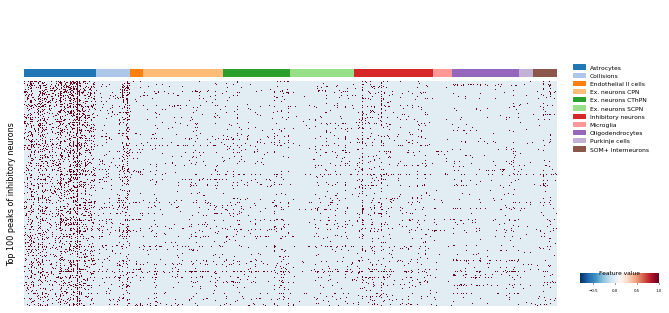

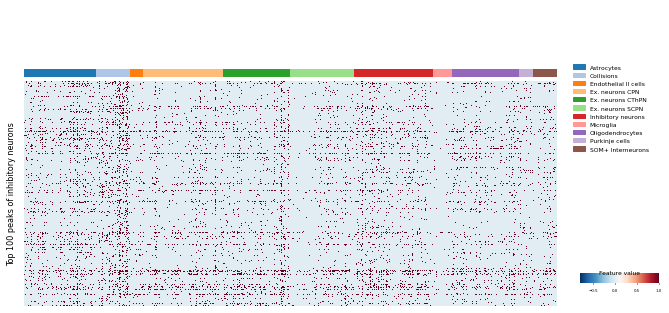

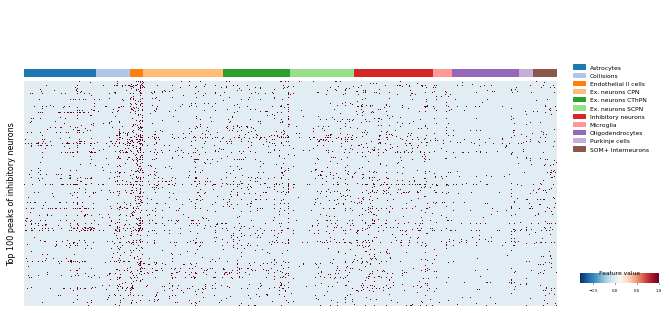

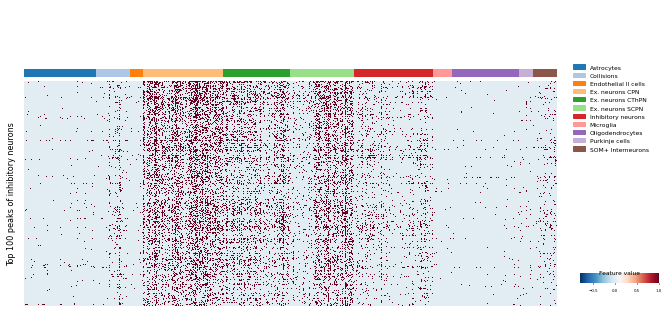

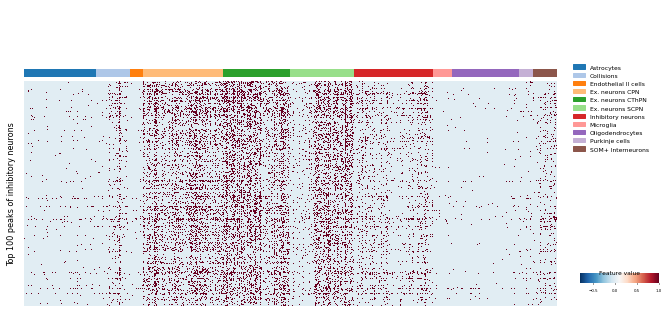

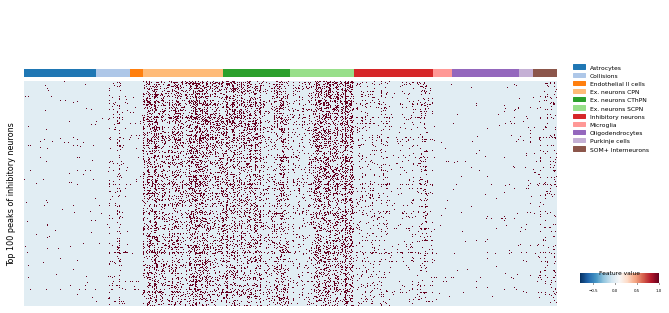

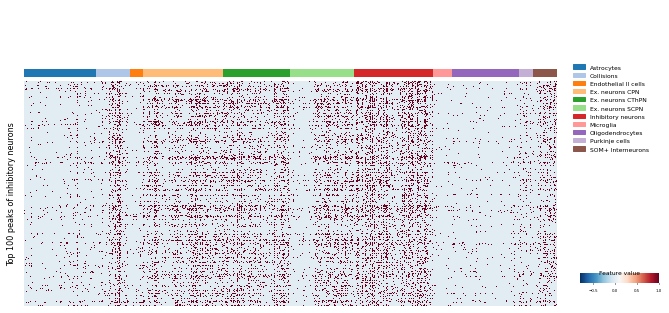

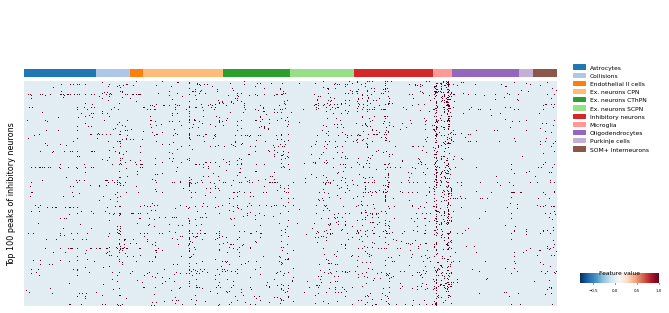

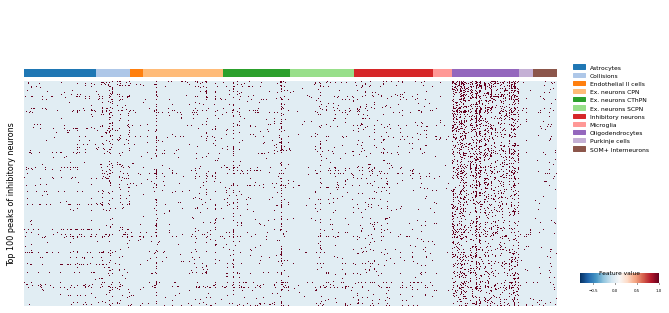

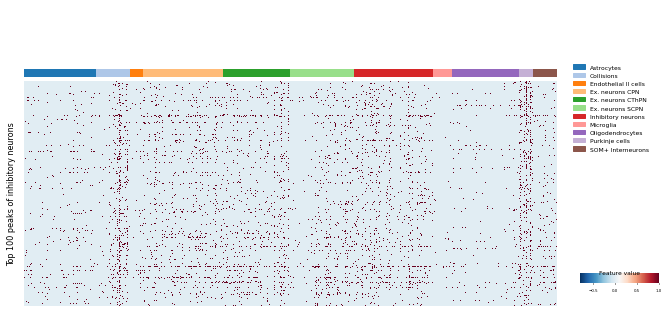

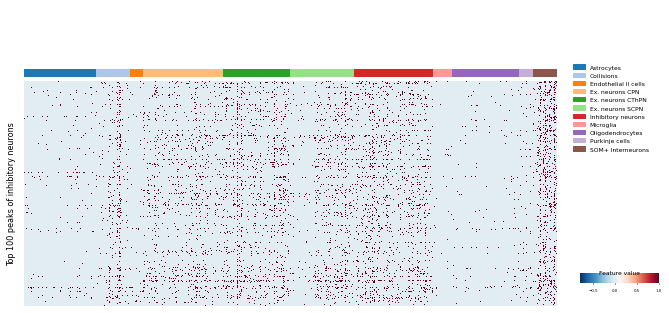

In [12]:
from matplotlib import pyplot as plt
def plot_heatmap(X, y, classes=None, y_pred=None, row_labels=None, colormap=None, row_cluster=False,
                 cax_title='', xlabel='', ylabel='', yticklabels='', legend_font=10, 
                 show_legend=True, show_cax=True, tick_color='black', ncol=3,
                 bbox_to_anchor=(0.5, 1.3), position=(0.8, 0.78, .1, .04), return_grid=False,
                 save=None, **kw):
    """
    plot hidden code heatmap with labels

    Params:
        X: fxn array, n is sample number, f is feature
        y: a array of labels for n elements or a list of array
    """

    import matplotlib.patches as mpatches  # add legend
    # if classes is not None:
    X, y, classes, index = sort_by_classes(X, y, classes)
    # else:
        # classes = np.unique(y)

    if y_pred != None:
        y_pred = y_pred[index]
        classes = list(classes) + list(np.unique(y_pred)) 
        if colormap is None:
            colormap = plt.cm.tab20
            colors = {c:colormap(i) for i, c in enumerate(classes)}
        else:
            colors = {c:colormap[i] for i, c in enumerate(classes)}
        col_colors = []
        col_colors.append([colors[c] for c in y])
        col_colors.append([colors[c] for c in y_pred])
    else:
        if colormap is None:
            colormap = plt.cm.tab20
            colors = {c:colormap(i) for i, c in enumerate(classes)}
        else:
            colors = {c:colormap[i] for i, c in enumerate(classes)}
        col_colors = [ colors[c] for c in y ]
        
    legend_TN = [mpatches.Patch(color=color, label=c) for c, color in colors.items()]

    if row_labels != None:
        row_colors = [ colors[c] for c in row_labels ]
        kw.update({'row_colors':row_colors})

    kw.update({'col_colors':col_colors})

    cbar_kws={"orientation": "horizontal"}
    grid = sns.clustermap(X, yticklabels=True, 
            col_cluster=False,
            row_cluster=row_cluster,
            cbar_kws=cbar_kws, **kw)
    if show_cax:
        grid.cax.set_position(position)
        grid.cax.tick_params(length=1, labelsize=4, rotation=0)
        grid.cax.set_title(cax_title, fontsize=6, y=0.35)

    if show_legend:
        grid.ax_heatmap.legend(loc='upper center', 
                               bbox_to_anchor=bbox_to_anchor, 
                               handles=legend_TN, 
                               fontsize=legend_font, 
                               frameon=False, 
                               ncol=ncol)
        grid.ax_col_colors.tick_params(labelsize=6, length=0, labelcolor='orange')
 
    if (row_cluster==True) and (yticklabels != ''):
        yticklabels = yticklabels[grid.dendrogram_row.reordered_ind]

    grid.ax_heatmap.set_xlabel(xlabel)
    grid.ax_heatmap.set_ylabel(ylabel, fontsize=8)
    grid.ax_heatmap.set_xticklabels('')
    grid.ax_heatmap.set_yticklabels(yticklabels, color=tick_color)
    grid.ax_heatmap.yaxis.set_label_position('left')
    grid.ax_heatmap.tick_params(axis='x', length=0)
    grid.ax_heatmap.tick_params(axis='y', labelsize=6, length=0, rotation=0, labelleft=True, labelright=False)
    grid.ax_row_dendrogram.set_visible(False)
    grid.cax.set_visible(show_cax)
    grid.row_color_labels = classes

    if save:
        plt.savefig(save, format='pdf', bbox_inches='tight')
    else:
        plt.show()
    if return_grid:
        return grid
    
def sort_by_classes(X, y, classes):
    if classes is None:
        classes = np.unique(y)
    index = []
    #print(classes)
    #print(y)
    for c in classes:
        #print(np.where(y==c))
        ind = np.where(y==c)[0]
        #print(ind)
        index.append(ind)
    index = np.concatenate(index)
    #print(index)
    X = X[:,index]
    y = y[index]
    return X, y, classes, index

for i in range(np.unique(ATAC_temp.obs['label']).shape[0]):
    ATAC_select = ATAC_temp[:, idx[:,i]]
    plot_heatmap(ATAC_select.X.todense().T, np.array(ATAC_select.obs['label']), vmin=-0.8, vmax=1, figsize=(10, 5), legend_font=6, cmap='RdBu_r', 
             bbox_to_anchor=(1.1, 1.1), position=(0.98, 0.2, .11, .03), ncol=1, 
              row_cluster=False, ylabel='Top 100 peaks of inhibitory neurons', cax_title='Feature value')

In [14]:
index = list(np.unique(ATAC_temp.obs['label']))
result = pd.DataFrame(columns=['Cofea','HDA','epiScanpy','Signac'], index=index)
for i in range(np.unique(ATAC_temp.obs['label']).shape[0]):
    ATAC_select = ATAC_temp[:, idx[:,i]]
    print(ATAC_select)
    data_temp = list(ATAC_select.var_names)
    data = []
    for item in data_temp:
        data.append(item.split('_'))
    data = np.array(data)
    data = pd.DataFrame(data)
    data[0] = data[0].astype(str)
    data[1] = data[1].astype(int)
    data[2] = data[2].astype(int)

    data_inter = pd.merge(data_choose_Cofea,data,on=[0,1,2],validate="one_to_many")
    result['Cofea'][index[i]] = data_inter.shape[0] / data.shape[0]
    data_inter = pd.merge(data_choose_HDA,data,on=[0,1,2],validate="one_to_many")
    result['HDA'][index[i]] = data_inter.shape[0] / data.shape[0]
    data_inter = pd.merge(data_choose_epi,data,on=[0,1,2],validate="one_to_many")
    result['epiScanpy'][index[i]] = data_inter.shape[0] / data.shape[0]
    data_inter = pd.merge(data_choose_sig,data,on=[0,1,2],validate="one_to_many")
    result['Signac'][index[i]] = data_inter.shape[0] / data.shape[0]
result

View of AnnData object with n_obs × n_vars = 12224 × 1000
    obs: 'label'
    uns: 'rank_genes_groups'
View of AnnData object with n_obs × n_vars = 12224 × 1000
    obs: 'label'
    uns: 'rank_genes_groups'
View of AnnData object with n_obs × n_vars = 12224 × 1000
    obs: 'label'
    uns: 'rank_genes_groups'
View of AnnData object with n_obs × n_vars = 12224 × 1000
    obs: 'label'
    uns: 'rank_genes_groups'
View of AnnData object with n_obs × n_vars = 12224 × 1000
    obs: 'label'
    uns: 'rank_genes_groups'
View of AnnData object with n_obs × n_vars = 12224 × 1000
    obs: 'label'
    uns: 'rank_genes_groups'
View of AnnData object with n_obs × n_vars = 12224 × 1000
    obs: 'label'
    uns: 'rank_genes_groups'
View of AnnData object with n_obs × n_vars = 12224 × 1000
    obs: 'label'
    uns: 'rank_genes_groups'
View of AnnData object with n_obs × n_vars = 12224 × 1000
    obs: 'label'
    uns: 'rank_genes_groups'
View of AnnData object with n_obs × n_vars = 12224 × 1000
    ob

,Cofea,HDA,epiScanpy,Signac
Astrocytes,0.002,0.002,0.002,0.009
Collisions,0.0,0.084,0.084,0.098
Endothelial II cells,0.006,0.001,0.001,0.002
Ex. neurons CPN,0.442,0.081,0.081,0.039
Ex. neurons CThPN,0.308,0.118,0.118,0.072
Ex. neurons SCPN,0.517,0.034,0.034,0.014
Inhibitory neurons,0.001,0.176,0.176,0.133
Microglia,0.0,0.0,0.0,0.001
Oligodendrocytes,0.0,0.002,0.002,0.005
Purkinje cells,0.0,0.011,0.011,0.011


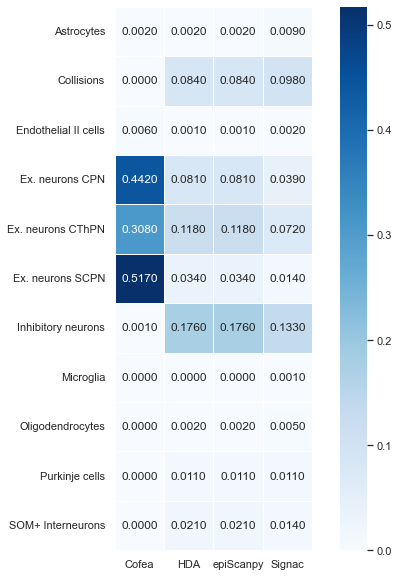

In [16]:
result = result.astype(float)
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data=result, linewidths=0.5, annot=True, fmt=".4f", cmap='Blues', square=True,annot_kws={'size': 12})
# plt.savefig('result_final/enhancer/enhancer_Brain_3.pdf', dpi=500)
plt.show()

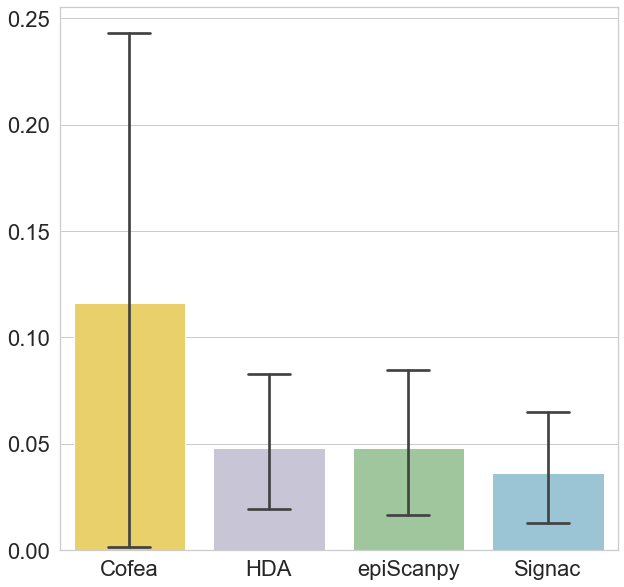

In [19]:
sns.set_theme(style='whitegrid',font_scale=2)
sns.barplot(data=result, palette=["#FFDD55","#C6C2DA","#9ACD97","#92C9DD"],capsize=.3)
# plt.savefig('/home/likeyi/program/method/result_final/enhancer/enhancer_epi_Brain_2.pdf', dpi=500)
plt.show()

In [23]:
index = list(np.unique(ATAC_temp.obs['label']))
enhencer_result = pd.DataFrame(columns=['Cofea','HDA','epiScanpy','Signac'], index=index)
for idx, filename in enumerate(os.listdir('../data/analysis/enhancer/')):
    print(idx, filename)
    data_enhancer = pd.read_csv('../data/analysis/enhancer/' + filename, sep='\t', comment='t', header=None)
    index = enhencer_result.index[idx]
    print(index)
    data_inter = pd.merge(data_choose_Cofea,data_enhancer,on=[0,1,2],validate="one_to_many")
    enhencer_result['Cofea'][index] = data_inter.shape[0] / data_choose_Cofea.shape[0]
    data_inter = pd.merge(data_choose_HDA,data_enhancer,on=[0,1,2],validate="one_to_many")
    enhencer_result['HDA'][index] = data_inter.shape[0] / data_choose_HDA.shape[0]
    data_inter = pd.merge(data_choose_epi,data_enhancer,on=[0,1,2],validate="one_to_many")
    enhencer_result['epiScanpy'][index] = data_inter.shape[0] / data_choose_epi.shape[0]
    data_inter = pd.merge(data_choose_sig,data_enhancer,on=[0,1,2],validate="one_to_many")
    enhencer_result['Signac'][index] = data_inter.shape[0] / data_choose_sig.shape[0]
enhencer_result

0 Brain_Purkinje_cells_enhancermm10frommm9.bed
Astrocytes
1 Brain_SOMp_Interneuron_enhancermm10frommm9.bed
Collisions
2 Brain_Ex_neur_SCPN_enhancermm10frommm9.bed
Endothelial II cells
3 Brain_Ex_neurons_CPN_enhancermm10frommm9.bed
Ex. neurons CPN
4 Brain_Astrocytes_enhancermm10frommm9.bed
Ex. neurons CThPN
5 Brain_Microglia_enhancermm10frommm9.bed
Ex. neurons SCPN
6 Brain_Collisions_enhancermm10frommm9.bed
Inhibitory neurons
7 Brain_Ex_neurons_CThPN_enhancermm10frommm9.bed
Microglia
8 Brain_inhib_neur_enhancermm10frommm9.bed
Oligodendrocytes
9 Brain_Oligodendrocyte_enhancermm10frommm9.bed
Purkinje cells
10 Brain_Endo_II_cell_enhancermm10frommm9.bed
SOM+ Interneurons


,Cofea,HDA,epiScanpy,Signac
Astrocytes,0.04,0.0822,0.0822,0.0812
Collisions,0.0922,0.085,0.085,0.0824
Endothelial II cells,0.2436,0.0852,0.0852,0.0824
Ex. neurons CPN,0.2434,0.0852,0.0852,0.0824
Ex. neurons CThPN,0.3742,0.0822,0.0822,0.082
Ex. neurons SCPN,0.025,0.0684,0.0684,0.0704
Inhibitory neurons,0.2412,0.0852,0.0852,0.0826
Microglia,0.2434,0.085,0.085,0.0822
Oligodendrocytes,0.196,0.085,0.085,0.0824
Purkinje cells,0.3602,0.0806,0.0806,0.0818


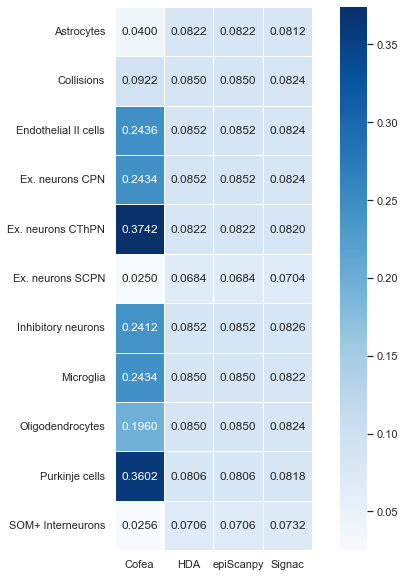

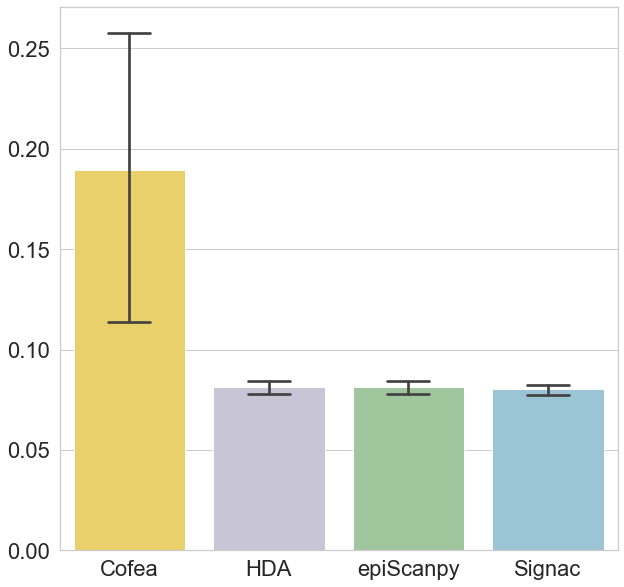

In [25]:
enhencer_result = enhencer_result.astype(float)
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data=enhencer_result, linewidths=0.5, annot=True, fmt=".4f", cmap='Blues', square=True,annot_kws={'size': 12})
# plt.savefig('result_final/enhancer/enhancer_Brain_3.pdf', dpi=500)
plt.show()
sns.set_theme(style='whitegrid',font_scale=2)
sns.barplot(data=enhencer_result, palette=["#FFDD55","#C6C2DA","#9ACD97","#92C9DD"],capsize=.3)
plt.show()